In [1]:
from src.agent import AgentPPT
from src.openai import generate_image, query
from src.ppt_reader import get_shape_content
from src.utils import fromEmus, ppt_to_pdf, pdf_to_img, toEmus
from pptx import Presentation
import src.prompts as prompts
import json, os, tempfile, shutil


In [3]:
agent = AgentPPT()
r = agent.plan_module("Plan a birthday party at the aquarium.")
agent.save_ppt()

2025-04-03 18:27:55 - AgentPPT instance created with model: gpt-4o, src_path: src_path, dst_path: working.pptx 

2025-04-03 18:27:55 - Cleared chat history. 

2025-04-03 18:27:55 - New presentation created 

2025-04-03 18:27:55 - Calling PLAN module with prompt: Plan a birthday party at the aquarium. 

2025-04-03 18:27:58 - Enhanced orginal prompt:
Enhanced Query: "Plan a birthday party at the aquarium. Create a PowerPoint presentation with the following structure: 

1. **Title Slide**: Include the party theme, date, and location.
2. **Overview Slide**: Briefly describe the aquarium and its features.
3. **Guest List Slide**: Outline the number of guests and any special considerations (e.g., age groups).
4. **Activities Slide**: List planned activities such as guided tours, feeding sessions, and interactive exhibits.
5. **Food and Beverage Slide**: Detail the catering options, including menu items and any dietary restrictions.
6. **Decorations Slide**: Suggest decoration ideas that fit 

In [7]:
agent.plan_module("I'm expecting 3 guests and there should be bird petting")
agent.save_ppt()

2025-04-03 17:46:00 - Calling PLAN module with prompt: I'm expecting 3 guests and there should be bird petting 

2025-04-03 17:46:02 - Calling ACTION module on slide 3 with prompt: Modify the slide to fulfil the following:Update the guest list to reflect 3 expected guests, including children and adults. Remove any mention of special considerations for age-appropriate activities and dietary restrictions. 

2025-04-03 17:46:04 - API - modify_shape | Status - SUCCESS | Shape modified: {"text": "\nOutline the expected number of 3 guests, including children and adults."} | Arguments - {'shape_index': 1, 'instructions': "Update the text to reflect 3 expected guests, including children and adults. Remove any mention of special considerations for age-appropriate activities and dietary restrictions. The updated text should be: '\\nOutline the expected number of 3 guests, including children and adults.'"} 

2025-04-03 17:46:04 - Calling ACTION module on slide 4 with prompt: Modify the slide to f

In [6]:
agent = AgentPPT()
agent.insert_slide()
agent.action_module("""Change the contents of the slide to the folowing.Title: Day 1 - Discover Seoul
Content:
- Morning: Visit Gyeongbokgung Palace
  - Experience the Changing of the Guard ceremony
  - Explore the National Folk Museum
- Afternoon: Stroll through Insadong
  - Enjoy traditional tea houses and shops
- Evening: N Seoul Tower
  - Panoramic views of the city
  - Dine at the revolving restaurant """, slide_idx=0)
agent.save_ppt()

2025-04-02 22:01:18 - AgentPPT instance created with model: gpt-4o, src_path: src_path, dst_path: working.pptx 

2025-04-02 22:01:18 - Cleared chat history. 

2025-04-02 22:01:18 - New presentation created 

2025-04-02 22:01:18 - Calling ACTION module on slide 0 with prompt: Change the contents of the slide to the folowing.Title: Day 1 - Discover Seoul
Content:
- Morning: Visit Gyeongbokgung Palace
  - Experience the Changing of the Guard ceremony
  - Explore the National Folk Museum
- Afternoon: Stroll through Insadong
  - Enjoy traditional tea houses and shops
- Evening: N Seoul Tower
  - Panoramic views of the city
  - Dine at the revolving restaurant  

2025-04-02 22:01:25 - API - modify_shape | Status - SUCCESS | Shape modified: {"text": "Day 1 - Discover Seoul"} | Arguments - {'shape_index': 0, 'instructions': "Change text to 'Day 1 - Discover Seoul'."}
API - modify_shape | Status - SUCCESS | Shape modified: {"text": "\nMorning: Visit Gyeongbokgung Palace\n  Experience the Changi

In [3]:
agent = AgentPPT()
agent.render()

2025-04-02 18:06:31 - AgentPPT instance created with model: gpt-4o, src_path: src_path, dst_path: working.pptx 

2025-04-02 18:06:31 - Cleared chat history. 

2025-04-02 18:06:31 - New presentation created 



[<PIL.Image.Image image mode=RGB size=800x600>]

Conversion completed: 1 files converted successfully, 0 files failed.


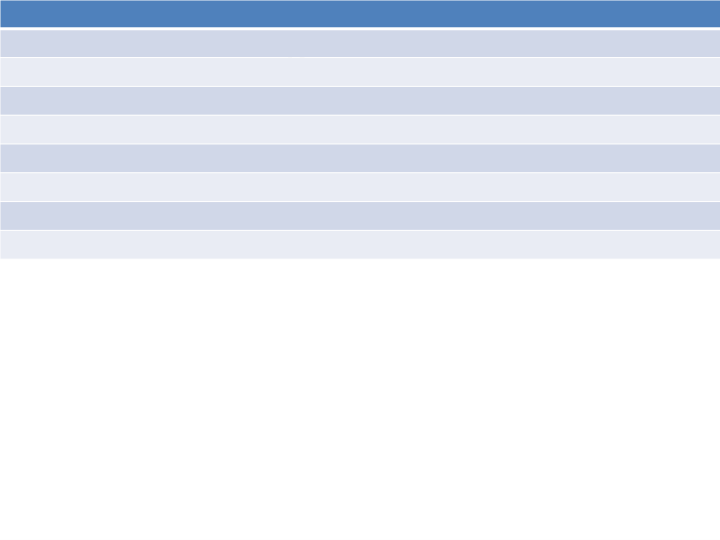

In [19]:
ppt = Presentation()
slide_layout = ppt.slide_layouts[1]
slide = ppt.slides.add_slide(slide_layout)
shape = slide.shapes[0]
shape.text = "Raccoon"
shape = slide.shapes.add_table(9, 2, 0, 0, toEmus(2*40), toEmus(3*12))
shape.table.columns[0].width = toEmus(500)
temp_dir = tempfile.mkdtemp()

temp_ppt_path = os.path.join(temp_dir, "temp_presentation.pptx")
ppt.save(temp_ppt_path)
pdf_path = ppt_to_pdf(temp_ppt_path, temp_dir)
imgs = slide_images = pdf_to_img(pdf_path)

shutil.rmtree(temp_dir)

imgs[0]

In [20]:
len(shape.)